In [1]:
import os
import pandas as pd




database = 'Diabetes'
#n , dimension = (6000, 123) 


path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/decomposition-measurement-ii/'
results_directory = path + f'results/{database}/'  # Replace this with the path to your directory
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
n_components_column_name = 'n-components'
total_training_time_mean_column = 'transform-and-training-time-mean'
total_training_time_std_column = 'transform-and-training-time-std'
# relevant column names 
transform_time_mean_column = 'transform-time-mean'
transform_time_std_column = 'transform-time-std'
training_time_mean_column = 'training-time-mean'
training_time_std_column = 'training-time-std'


# Get a list of all files in the directory
files = [file for file in os.listdir(results_directory) if os.path.isfile(os.path.join(results_directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
stats_files = [file for file in files if "stats" in file]
stats_files.sort() # kernel methods será el primero

kernel_files = [file for file in stats_files if ('kernel' in file and 'kernel-linear' not in file)]
random_features_files = [file for file in stats_files if file not in kernel_files]


# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    # mean
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    data['File'] = file  # Add a column to identify the file 
    # 
    data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
    data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

    random_features_data = pd.concat([random_features_data, data], ignore_index=True)
    random_features_list.append(data)
    random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

    data['File'] = file  # Add a column to identify the file
    data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
    data[total_training_time_mean_column] = data[training_time_mean_column]
    data[total_training_time_std_column] = data[training_time_std_column]

    kernel_data = pd.concat([kernel_data, data], ignore_index=True)
    kernel_list.append(data)
    kernel_list_names.append(file.replace('-stats.csv', ''))

print('Ridge files')
print(kernel_list_names)
print('kernel files')
print(kernel_list_names)
kernel_data



['Nystroem-SVC-kernel-linear-stats-a.csv', 'results.dict', 'Nystroem-linear-SVC-dual-false-stats-a.csv', 'RFF-linear-SVC-dual-false-stats-a.csv', 'kernel-SVC-verbose.csv', 'RFF-SVC-kernel-linear-stats-a.csv', 'RFF-verbose.csv', 'Nystroem-verbose.csv', 'kernel-SVC-stats.csv']
Ridge files
['kernel-SVC']
kernel files
['kernel-SVC']


,mean-refit-time-mean,mean-refit-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,0.003664,0.003664,0.18529,0.031961,0.017713,0.000045,0.800866,0.0,kernel-SVC-stats.csv,0.18529,0.031961


In [2]:
random_features_data

,n-components,fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,27,0.001037,0.001808,0.001037,0.001629,0.004599,0.000254,0.001156,0.000018,0.805916,0.004256,Nystroem-SVC-kernel-linear-stats-a.csv,0.005636,0.001883
1,29,0.000317,0.000024,0.000317,0.000449,0.004559,0.000038,0.001223,0.000025,0.805916,0.004256,Nystroem-SVC-kernel-linear-stats-a.csv,0.004877,0.000487
2,31,0.000322,0.000024,0.000322,0.000730,0.004614,0.000081,0.001243,0.000028,0.807359,0.005302,Nystroem-SVC-kernel-linear-stats-a.csv,0.004935,0.000811
3,32,0.000343,0.000049,0.000343,0.000024,0.004626,0.000102,0.001239,0.000015,0.805195,0.000000,Nystroem-SVC-kernel-linear-stats-a.csv,0.004969,0.000126
4,34,0.000333,0.000023,0.000333,0.000068,0.004701,0.000049,0.001267,0.000019,0.805195,0.002738,Nystroem-SVC-kernel-linear-stats-a.csv,0.005034,0.000118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,73,0.000132,0.000012,0.000132,0.000163,0.002750,0.000279,0.000233,0.000477,0.802309,0.009352,RFF-linear-SVC-dual-false-stats-a.csv,0.002882,0.000443
116,75,0.000136,0.000012,0.000136,0.000169,0.002511,0.000154,0.001300,0.003079,0.799423,0.006518,RFF-linear-SVC-dual-false-stats-a.csv,0.002647,0.000323
117,77,0.000135,0.000011,0.000135,0.000602,0.002744,0.000334,0.000051,0.000014,0.802309,0.008942,RFF-linear-SVC-dual-false-stats-a.csv,0.002879,0.000936
118,79,0.000132,0.000009,0.000132,0.000037,0.003030,0.000255,0.000044,0.000014,0.798701,0.008099,RFF-linear-SVC-dual-false-stats-a.csv,0.003163,0.000293


In [3]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File", column, n_components_column_name]]
   
      return dataframe

In [4]:
# get columns to be plot
mean_columns_to_be_plot = [column for column in random_features_data.columns if 'mean' in column]
std_columns_to_be_plot = [column for column in random_features_data.columns if 'std' in column]


# Sort by score 

In [5]:
show_dataframe(random_features_data,'score-mean' , ascending=False, n_rows=10)

,File,score-mean,n-components
88,RFF-SVC-kernel-linear-stats-a.csv,0.808,79
82,RFF-SVC-kernel-linear-stats-a.csv,0.808,68
2,Nystroem-SVC-kernel-linear-stats-a.csv,0.807,31
68,RFF-SVC-kernel-linear-stats-a.csv,0.807,42
69,RFF-SVC-kernel-linear-stats-a.csv,0.807,44
...,...,...,...
112,RFF-linear-SVC-dual-false-stats-a.csv,0.797,68
31,Nystroem-linear-SVC-dual-false-stats-a.csv,0.797,29
119,RFF-linear-SVC-dual-false-stats-a.csv,0.794,81
60,RFF-SVC-kernel-linear-stats-a.csv,0.792,27


# Plotting 

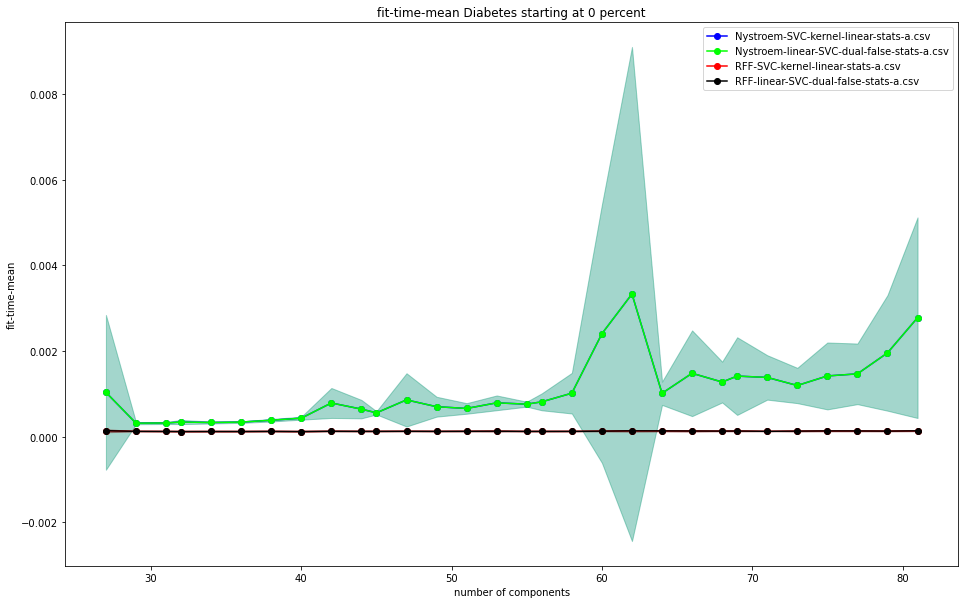

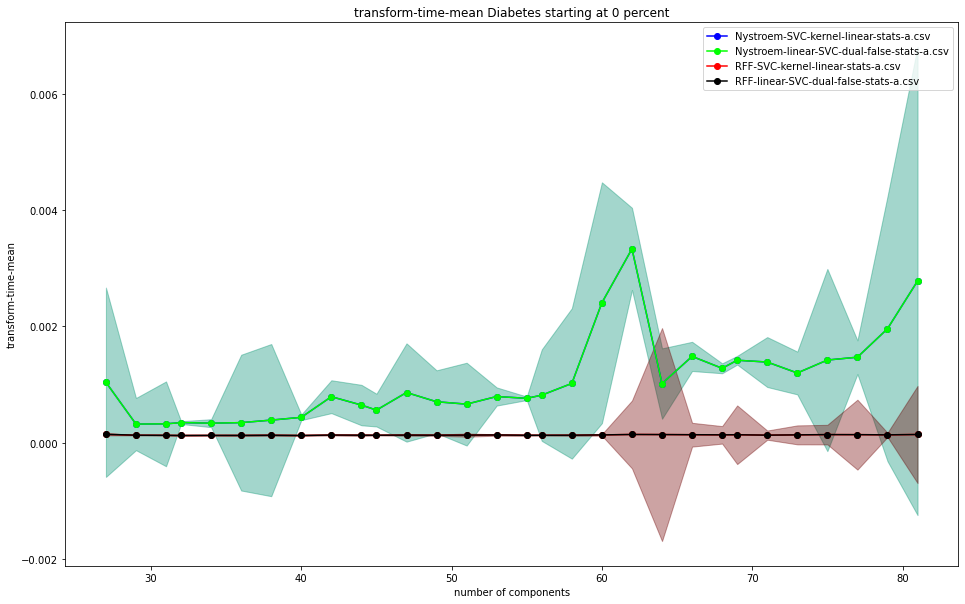

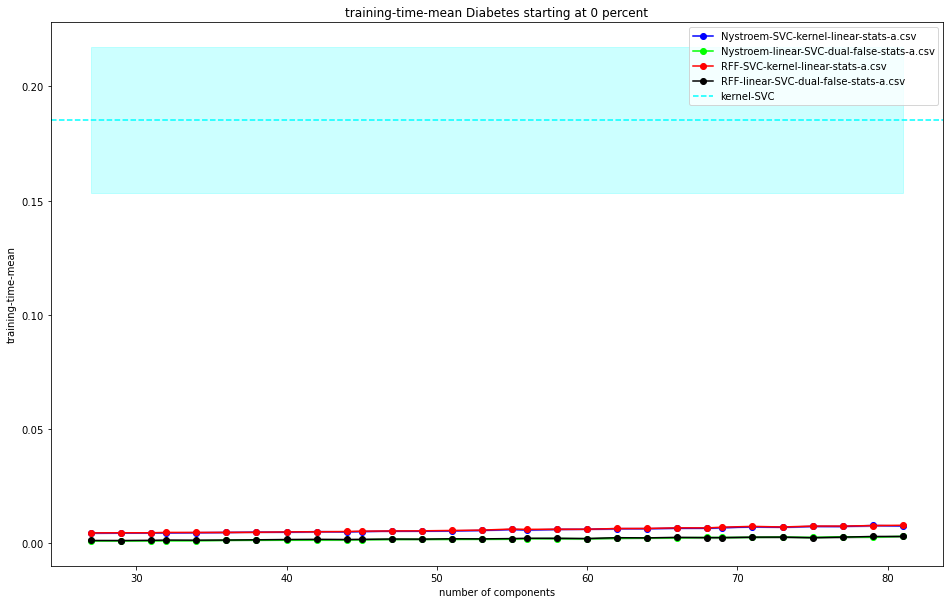

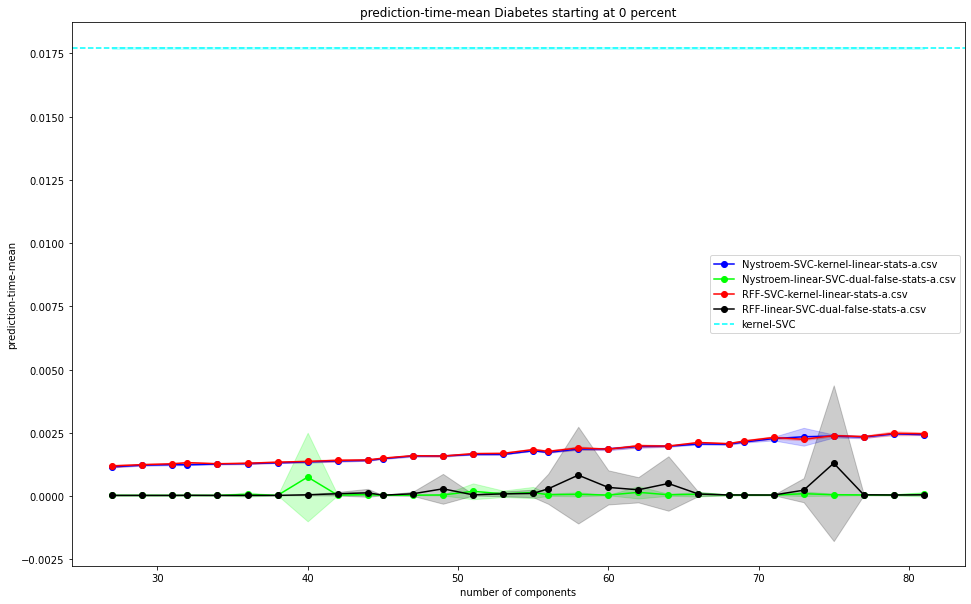

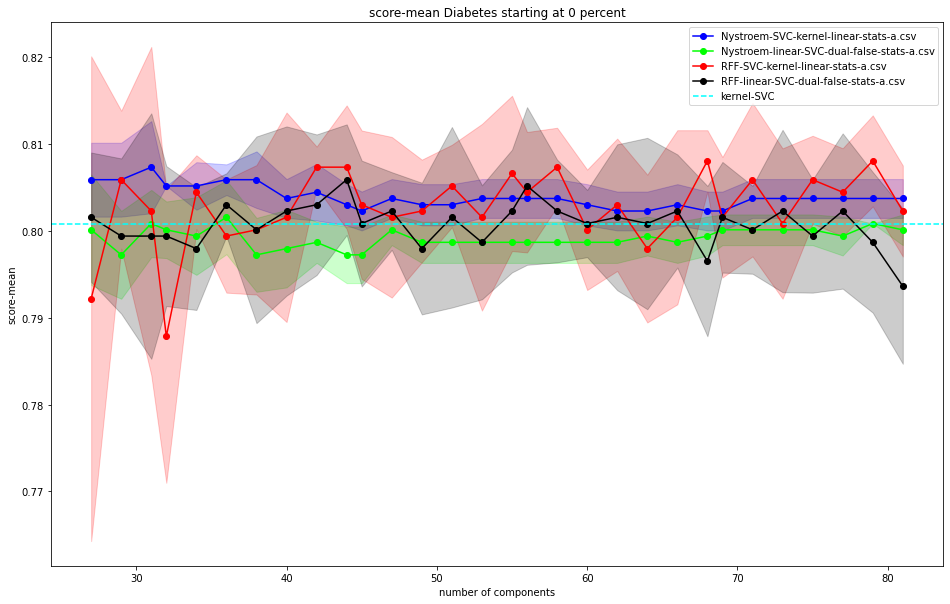

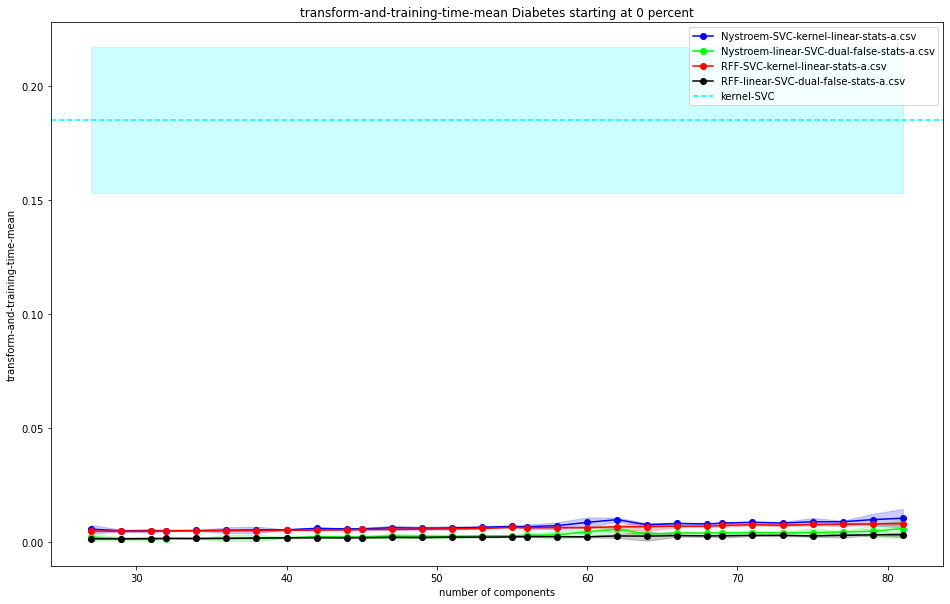

In [6]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')



In [7]:

# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    if not 'dual' in file:
        # mean
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
        #data[percent_column] = data.apply(compute_percent, axis=1)
        data['File'] = file  # Add a column to identify the file 
        # 
        data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
        data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

        random_features_data = pd.concat([random_features_data, data], ignore_index=True)
        random_features_list.append(data)
        random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    if not 'dual' in file:
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

        data['File'] = file  # Add a column to identify the file
        data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
        data[total_training_time_mean_column] = data[training_time_mean_column]
        data[total_training_time_std_column] = data[training_time_std_column]

        kernel_data = pd.concat([kernel_data, data], ignore_index=True)
        kernel_list.append(data)
        kernel_list_names.append(file.replace('-stats.csv', ''))


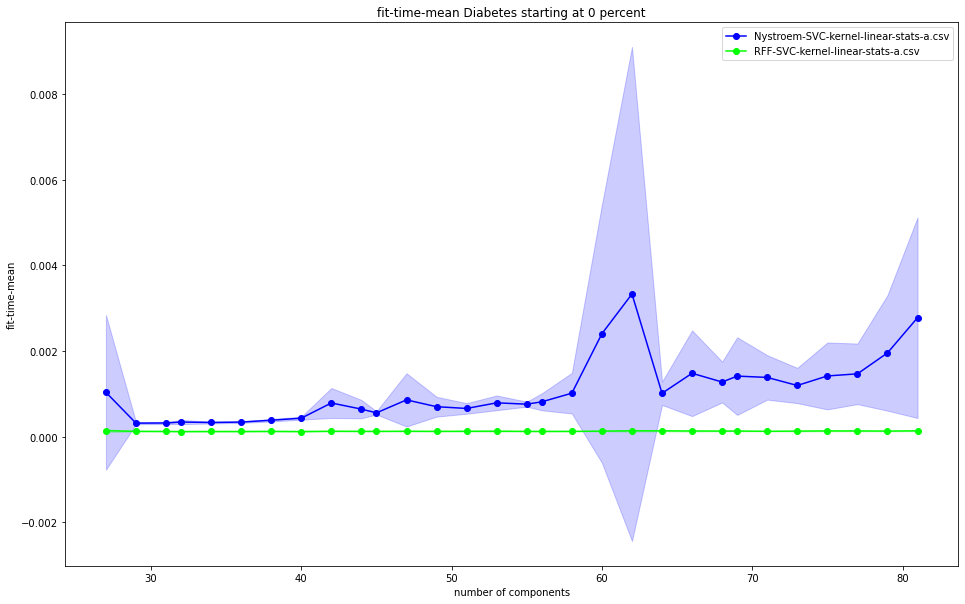

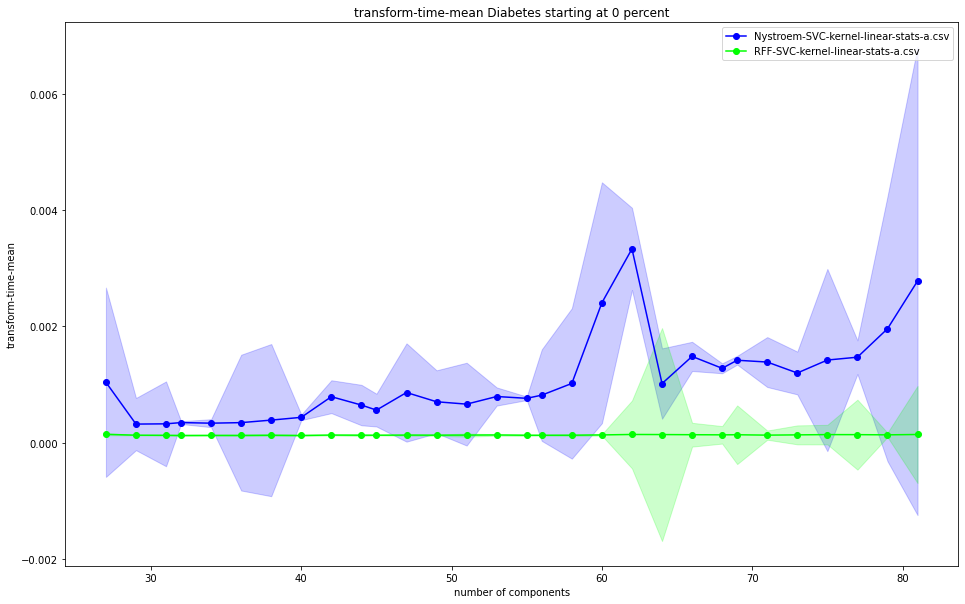

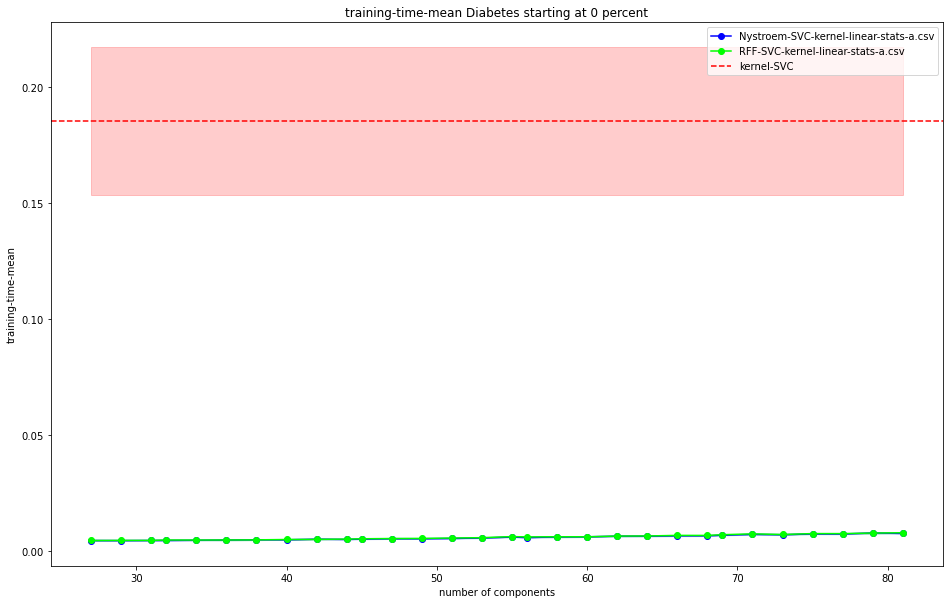

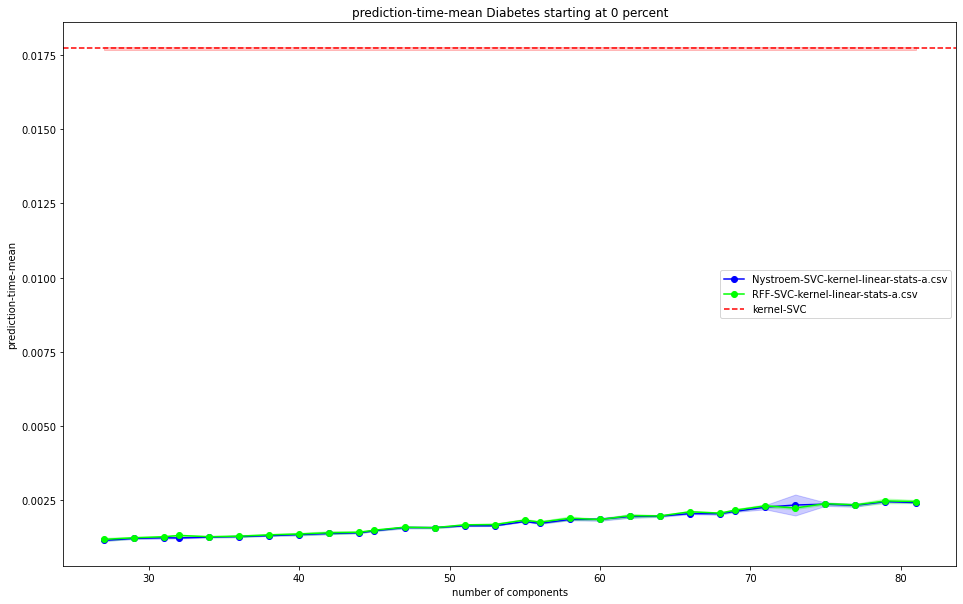

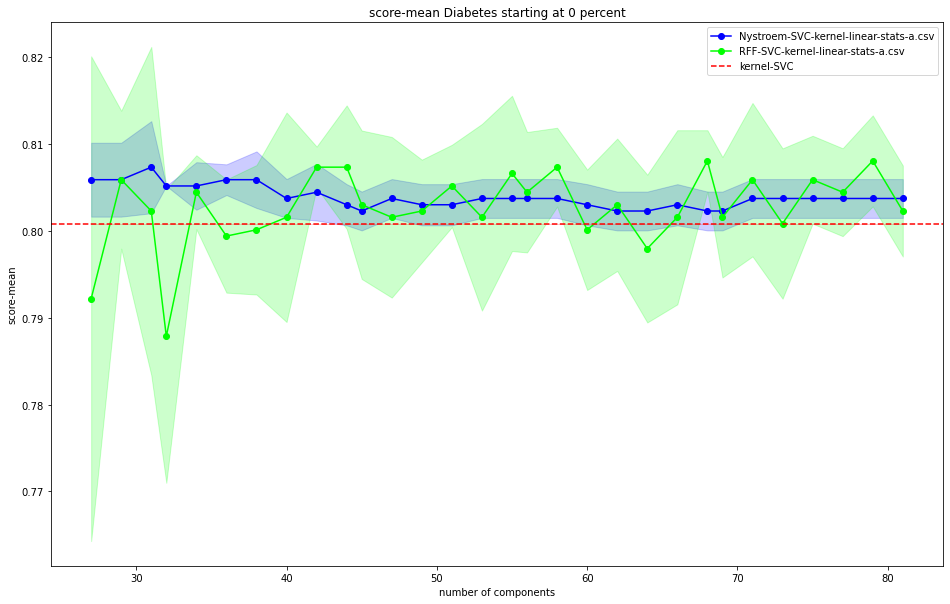

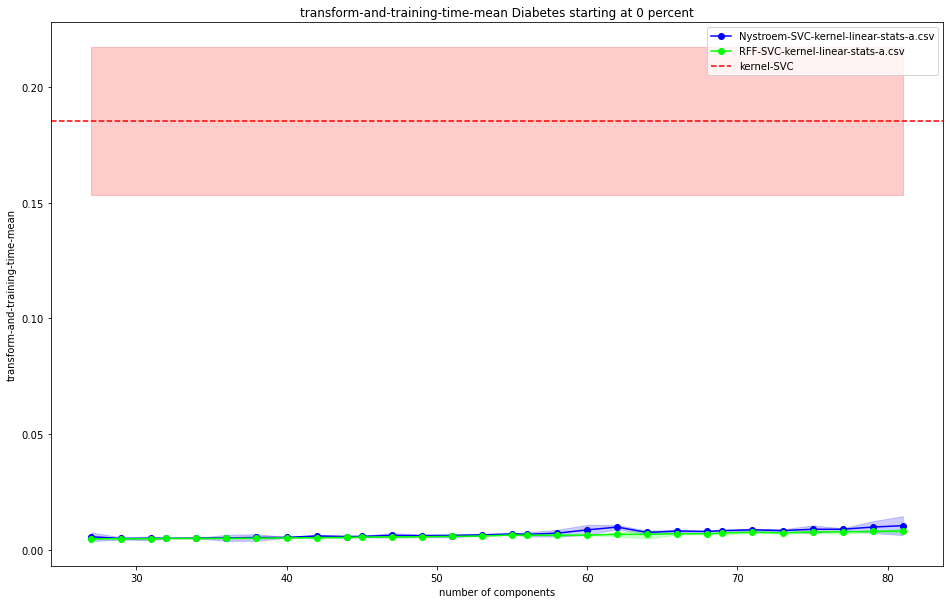

In [8]:
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')


# Sin kernel

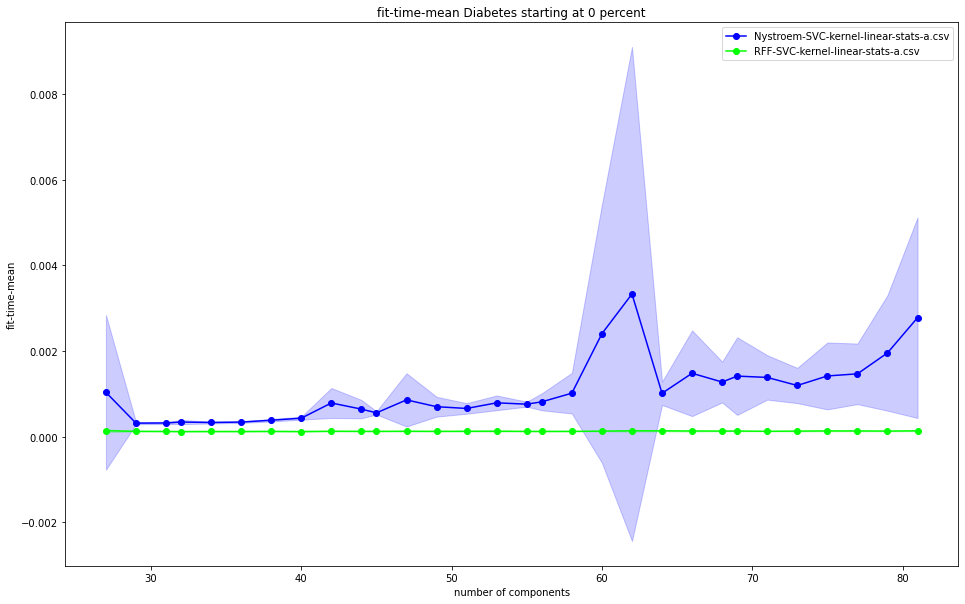

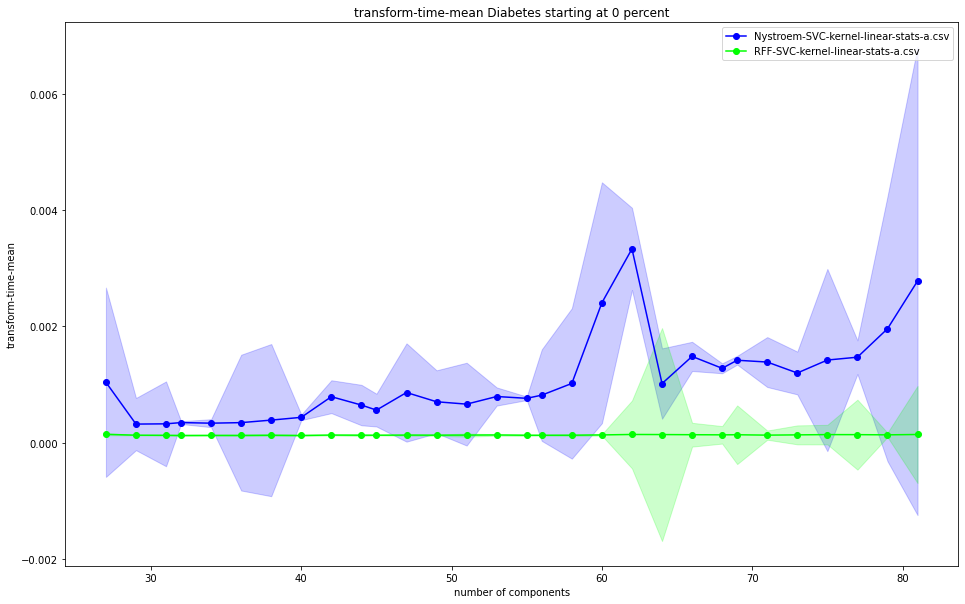

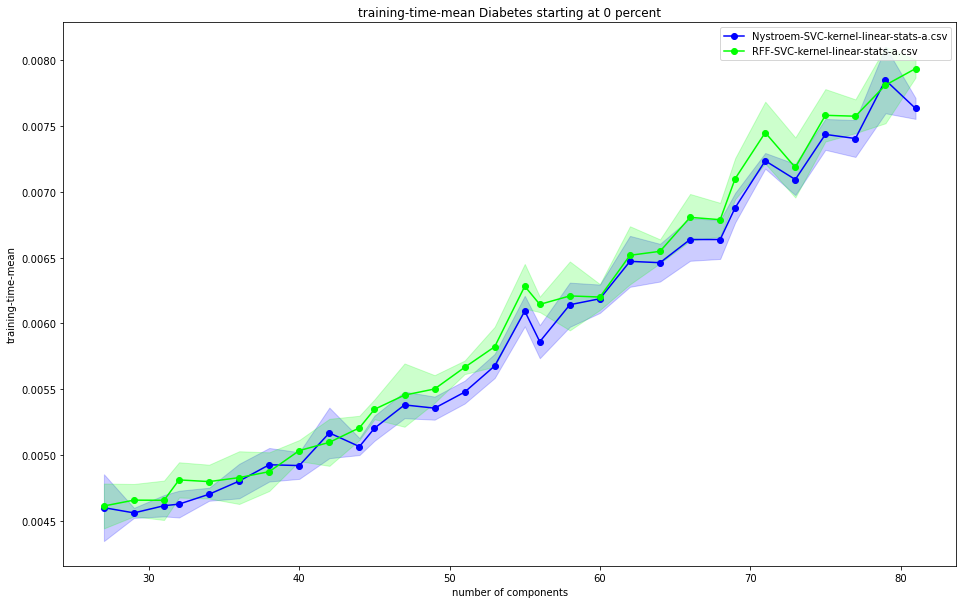

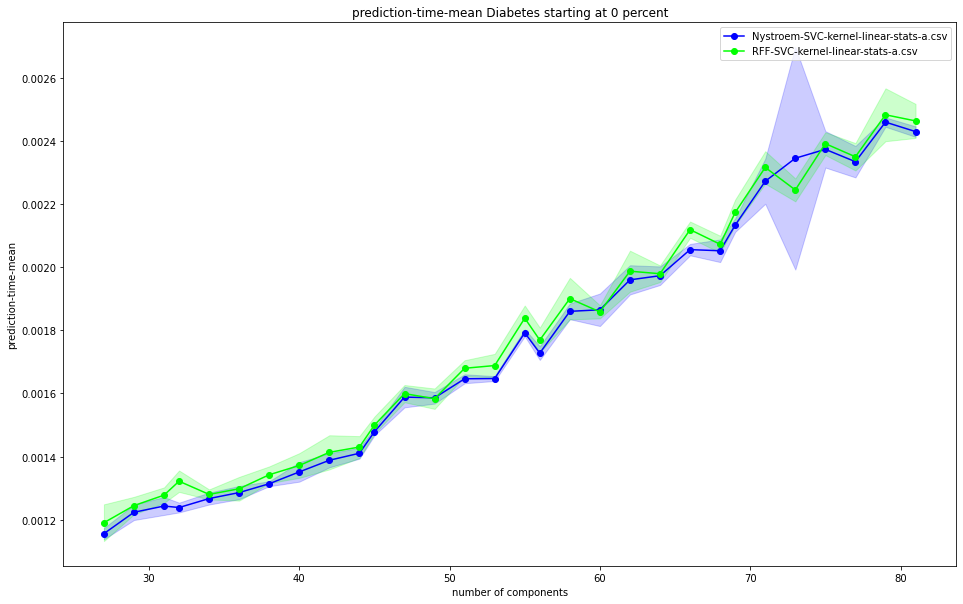

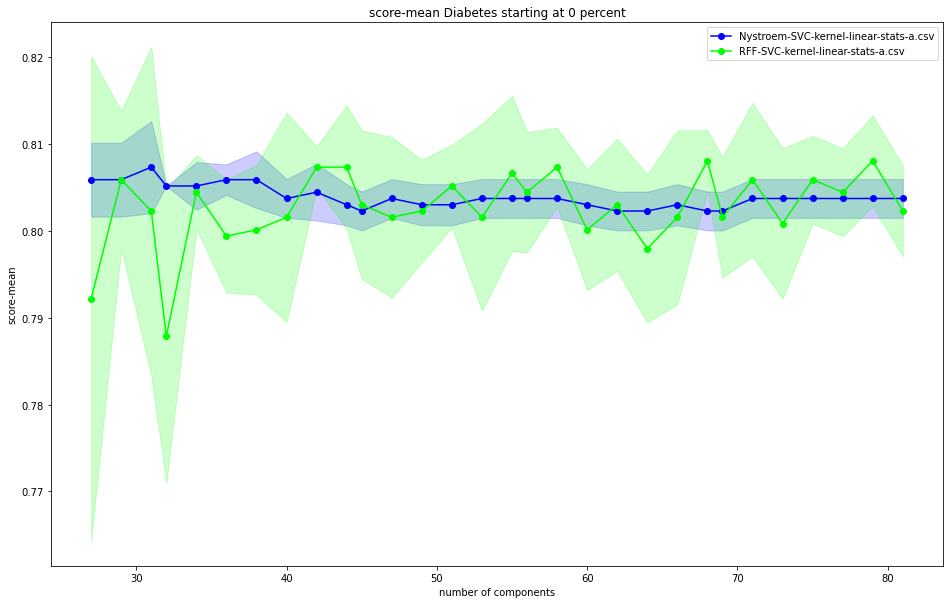

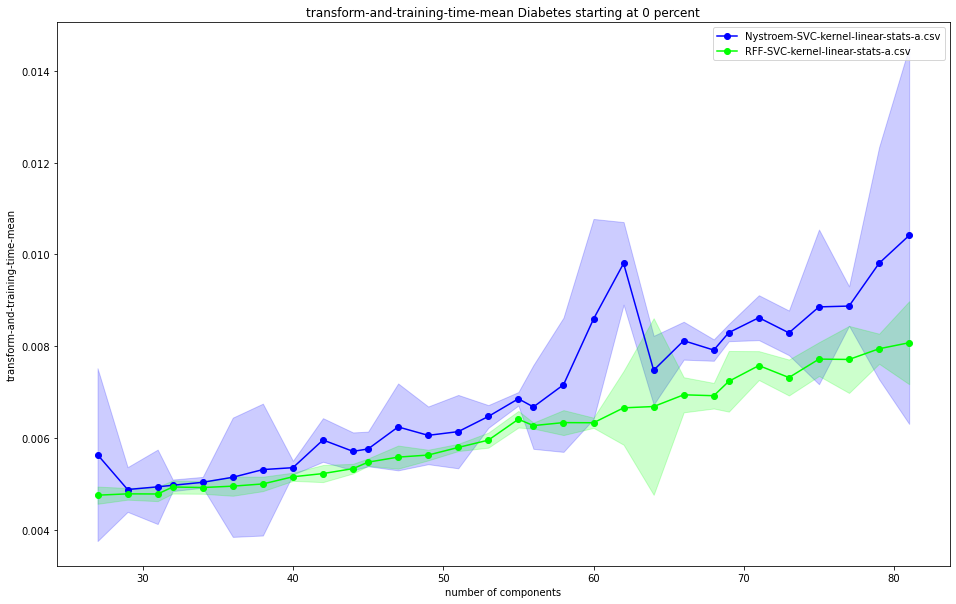

In [9]:
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=[], constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')

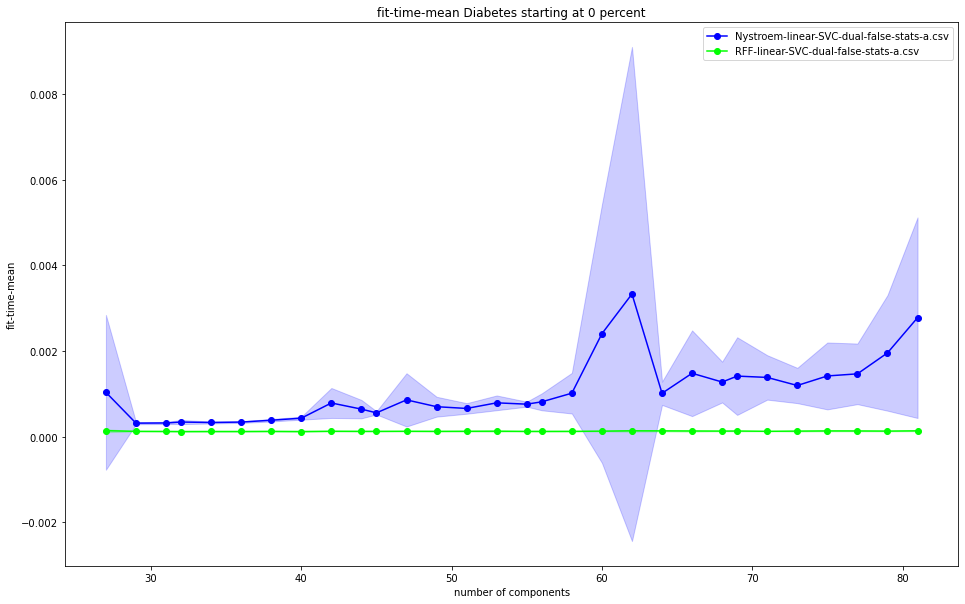

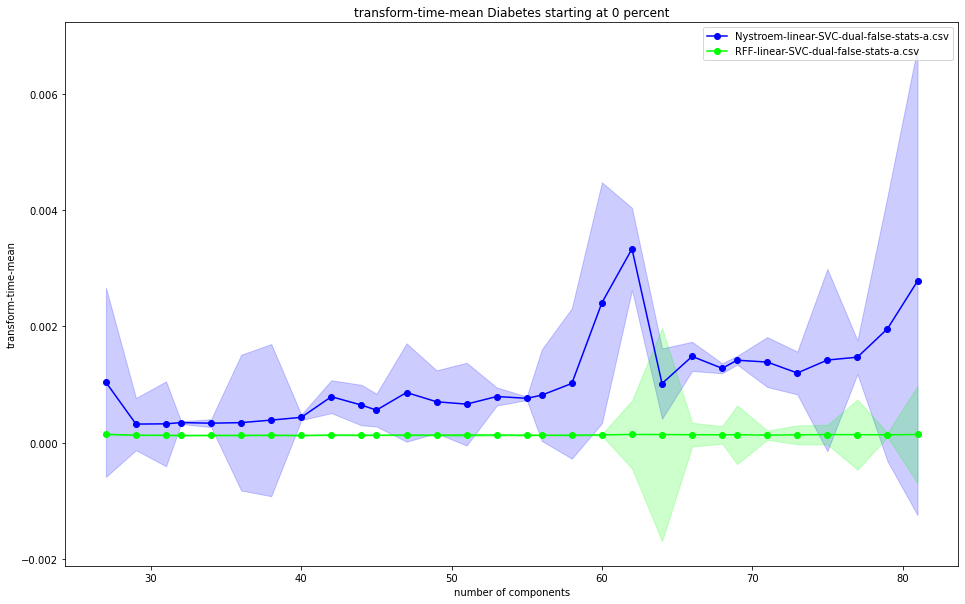

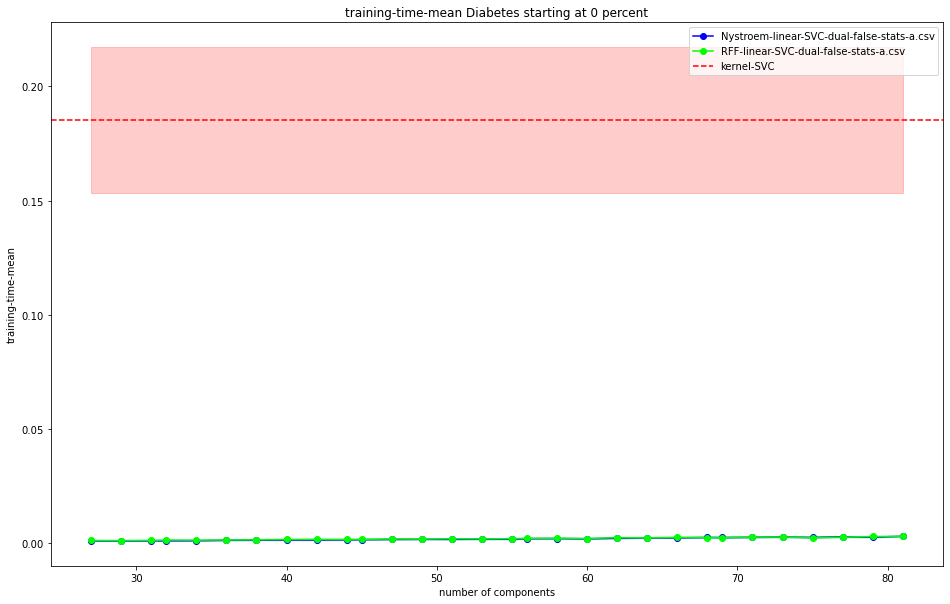

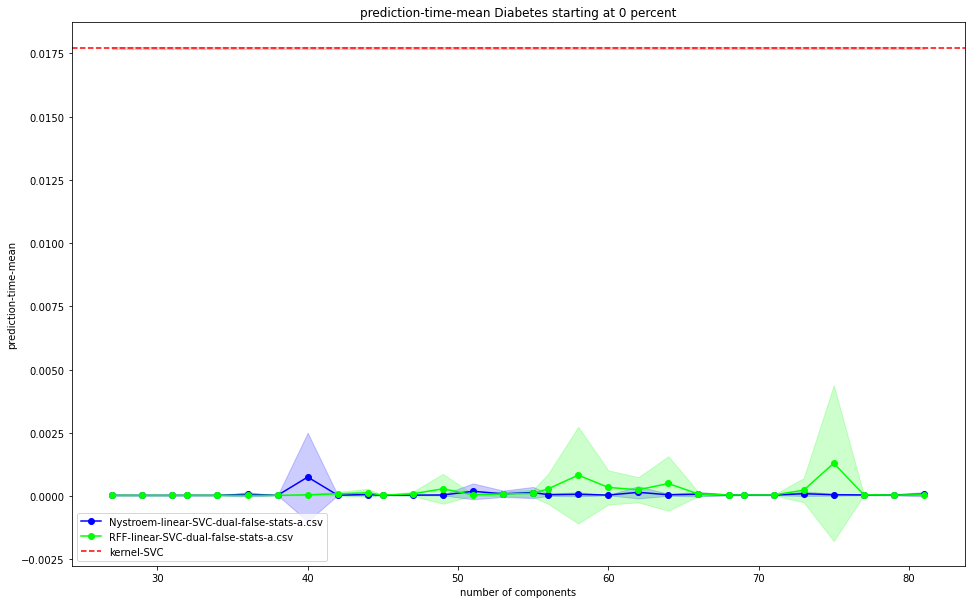

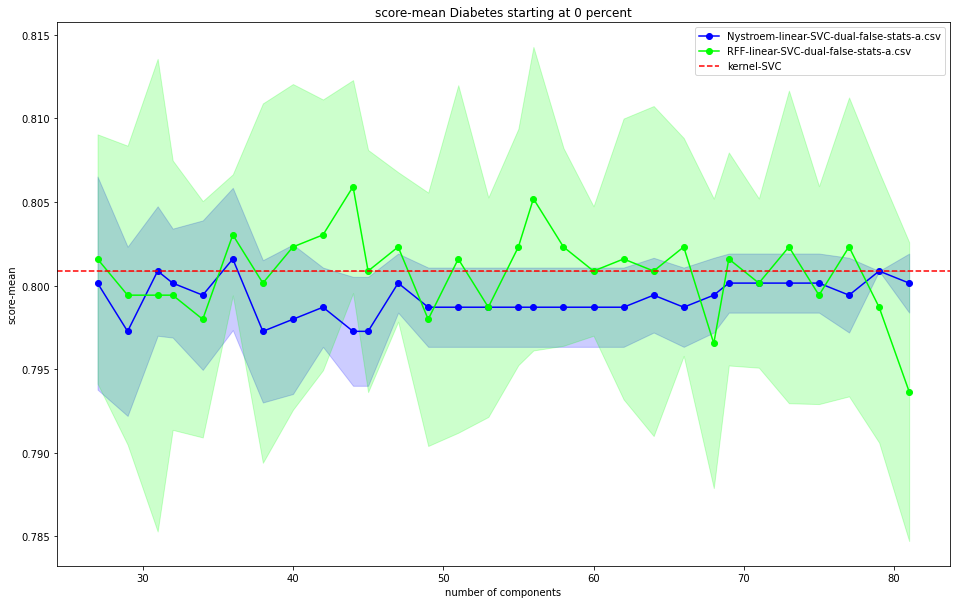

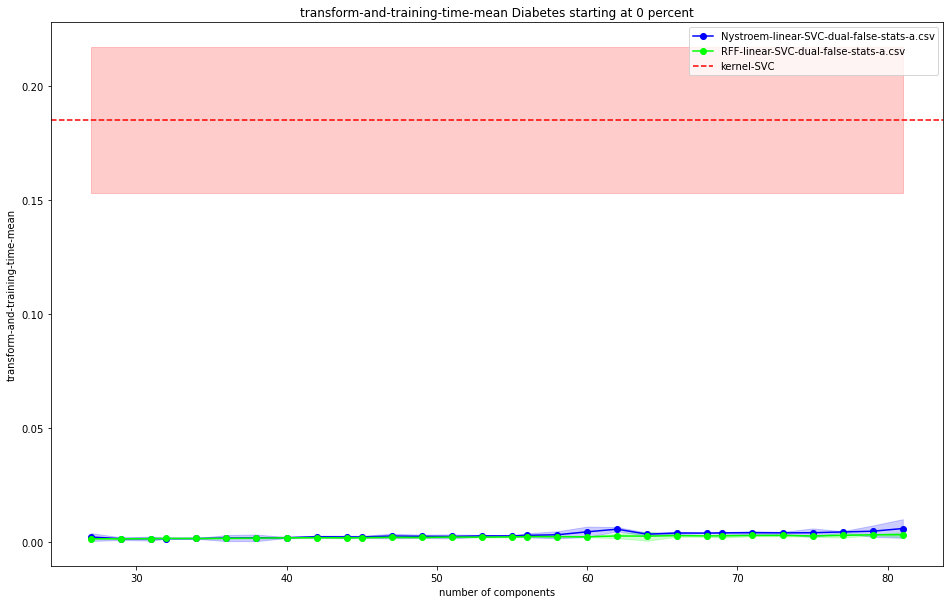

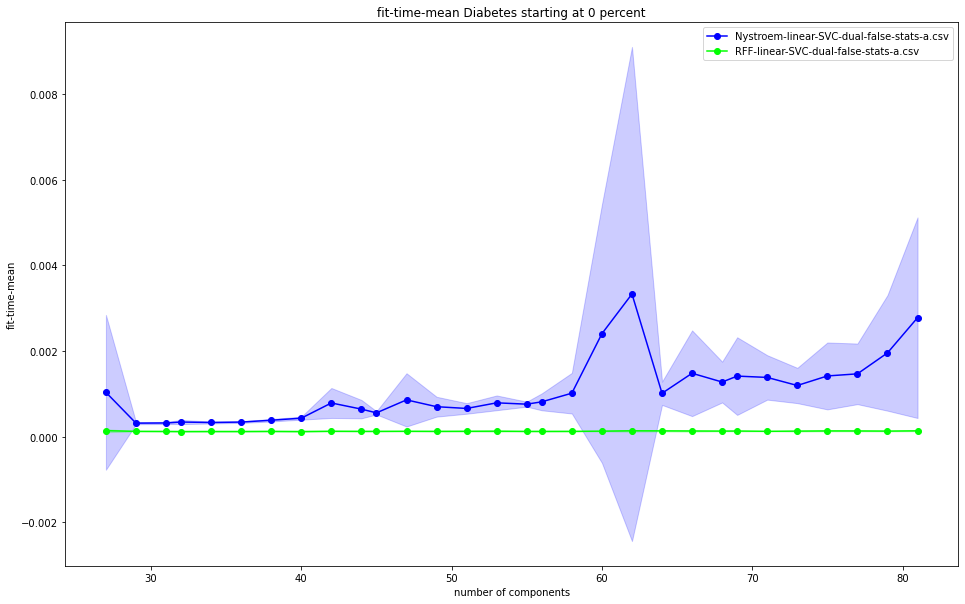

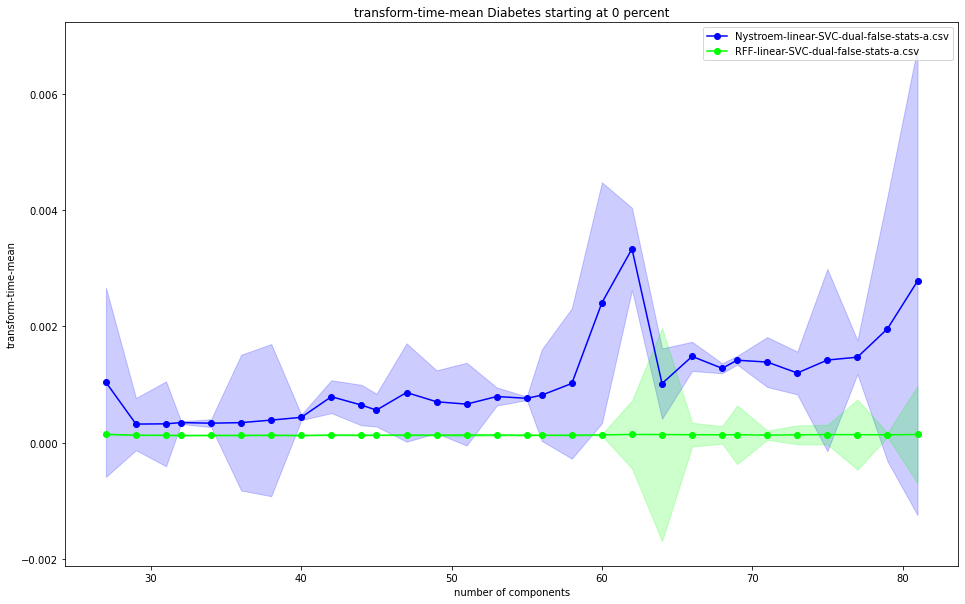

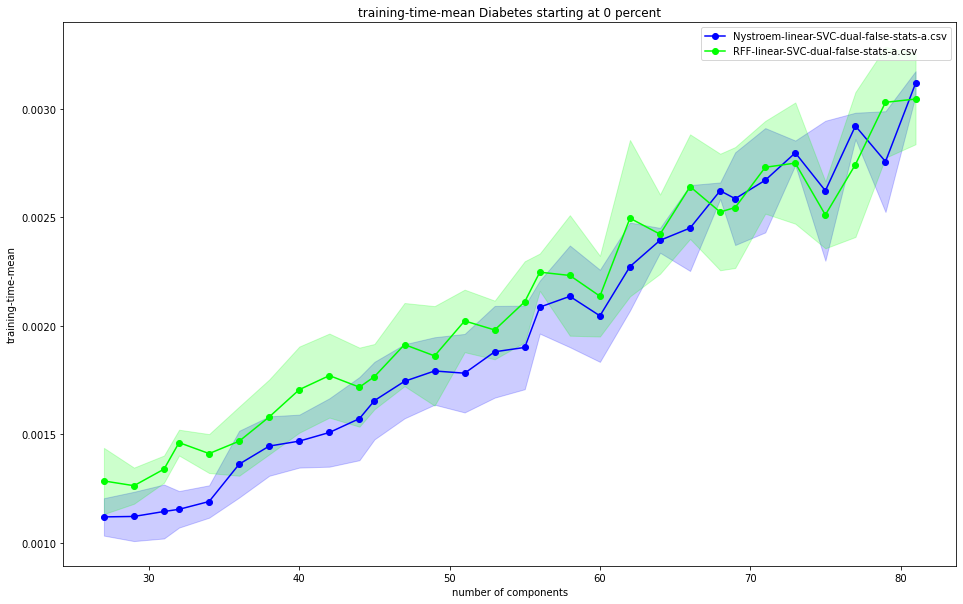

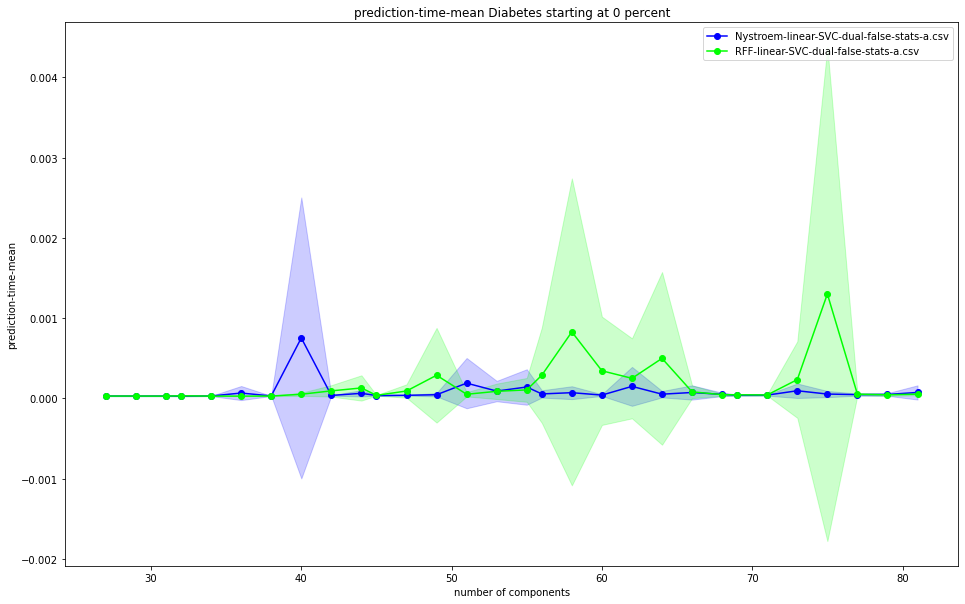

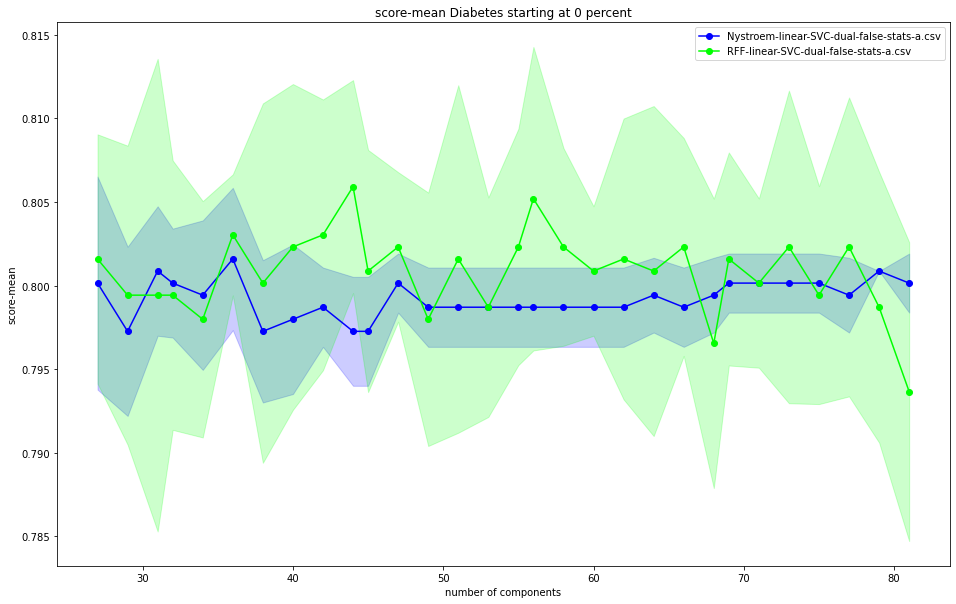

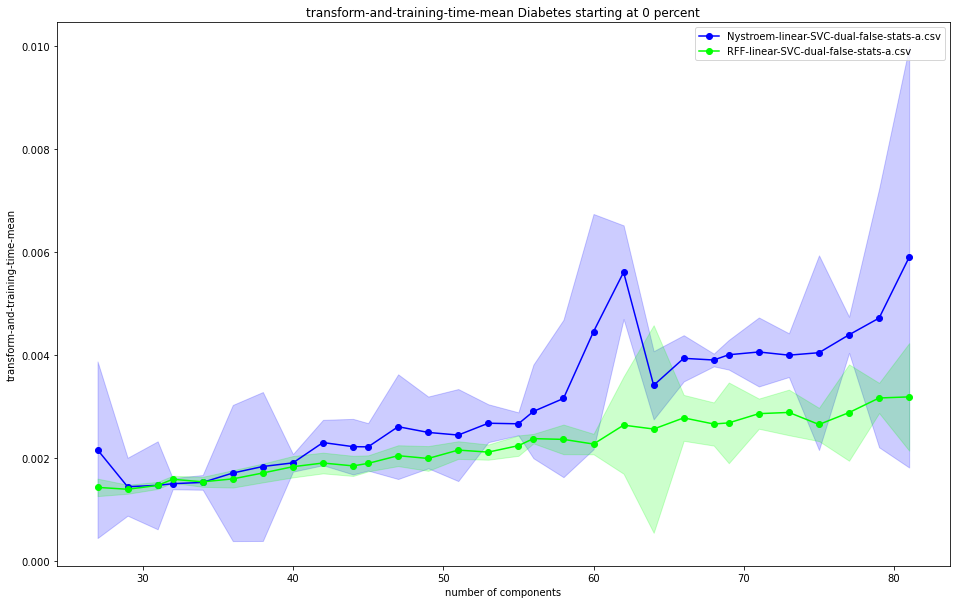

In [10]:

# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    if 'dual' in file or 'kernel-SVC' in file:
        # mean
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
        #data[percent_column] = data.apply(compute_percent, axis=1)
        data['File'] = file  # Add a column to identify the file 
        # 
        data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
        data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

        random_features_data = pd.concat([random_features_data, data], ignore_index=True)
        random_features_list.append(data)
        random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    if 'dual' in file or 'kernel-SVC' in file:
        file_path = os.path.join(results_directory, file)
        data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

        data['File'] = file  # Add a column to identify the file
        data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
        data[total_training_time_mean_column] = data[training_time_mean_column]
        data[total_training_time_std_column] = data[training_time_std_column]

        kernel_data = pd.concat([kernel_data, data], ignore_index=True)
        kernel_list.append(data)
        kernel_list_names.append(file.replace('-stats.csv', ''))


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')
view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=[], constant_labels=[],
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')